In [ ]:
pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import pickle


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Composto', axis=1)
dataset = dataset.drop('Átomos', axis=1)
print(dataset.columns)
corr_matrix = dataset.corr(method ='pearson', numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
dataset = dataset.drop(to_drop, axis=1)
print(len(dataset.columns))
print(dataset.columns)
dataset.drop("vel_of_sound_minimo", axis=1, inplace=True)
dataset.drop("mineral_hardness_maximo", axis=1, inplace=True)
print(dataset.columns)

datasetY = pd.read_excel('Input_Total.xlsx')

with open('scalerMLP.pickle', 'rb') as f:
    scaler = pickle.load(f)

with open('modelMLP.pkl', 'rb') as f:
    model = pickle.load(f)

X = dataset.iloc[:,:].values
y = datasetY.iloc[:,253].values


scaler.fit(X)
X= scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(accuracy_score(y_test, model.predict(X_test), sample_weight=None))



Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       ...
       'entropia-oxidos_minimo', 'entropia-oxidos_maximo',
       'entropia-oxidos_soma', 'entropia-oxidos_media',
       'entropia-oxidos_desvio', 'deltaCp-oxidos_minimo',
       'deltaCp-oxidos_maximo', 'deltaCp-oxidos_soma', 'deltaCp-oxidos_media',
       'deltaCp-oxidos_desvio'],
      dtype='object', length=204)
12
Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_en_allen _soma', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_hatm_minimo',
       'atomic_spacegroupnum_maximo', 'atomic_spacegroupnum_desvio',
       'mineral_hardness_maximo', 'van_der_waals_rad_minimo',
       'vel_of_sound_minimo'],
      dtype='object')
Index(['atomic_ea_minimo', 'atomic_e

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
print(len(X_test[0]))

10


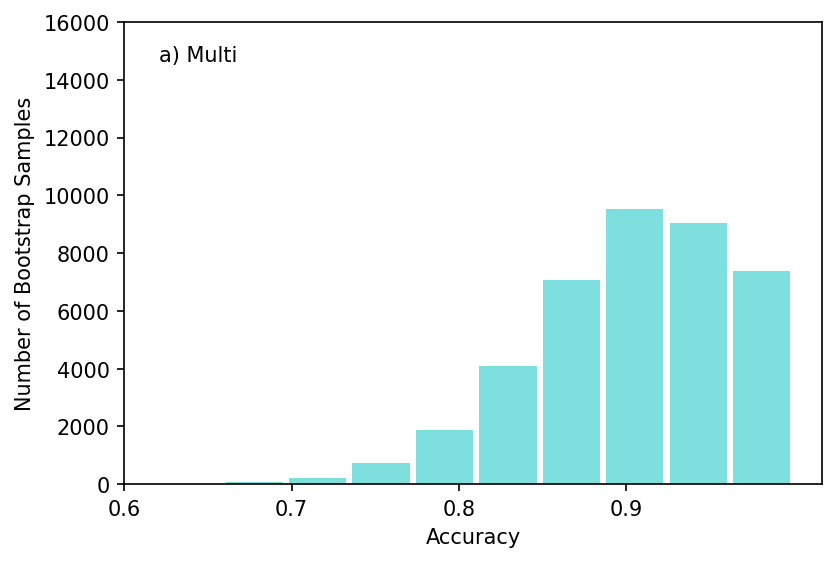

Intervalo de confiança : [0.7586206896551724,1.0]
Acurácia 'real' do modelo performada no teste : 0.896551724137931


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Intervalo de confiança da acurácia

def new_boot(X_test, y_test):
    novo_X = X_test.copy()
    novo_Y = y_test.copy()
    c = 0
    while c < len(X_test):
        rand = random.randint(0, len(X_test) - 1)
        novo_X[c] = X_test[rand].copy()
        novo_Y[c] = y_test[rand]
        c += 1
    return novo_X, novo_Y

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(novo_X, novo_Y):
    return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)

# Calcula a distribuição dos boots
numero_boots = 40001
lista_boots = []
contador = 0

while contador < numero_boots:
    x, y = new_boot(X_test, y_test)
    lista_boots.append(pegar_acuracia_do_relatorio(x, y))
    contador += 1


plt.figure(figsize=(6, 4),dpi=150)
plt.hist(lista_boots, rwidth=0.9, color='c', alpha=0.5)
plt.xlabel('Accuracy',fontsize=10)
plt.ylabel('Number of Bootstrap Samples',fontsize=10)

# Define a escala do eixo y
y_start = 0  # Valor inicial
y_end = 16000  # Valor final
y_step = 2000  # Incremento
plt.yticks(np.arange(y_start, y_end + y_step , y_step))

# Define a escala do eixo x
x_start = 0.6  # Valor inicial do eixo x
x_end = 1   # Valor final do eixo x
x_step = 0.1  # Incremento do eixo x
plt.xticks(np.arange(x_start, x_end , x_step))

text = "a) Multi"
plt.text(
   x=0.050, y=0.95, s=text, ha='left', va='top',
    transform=plt.gca().transAxes,
    fontsize=10,  # Mesmo tamanho de fonte
    fontfamily='DejaVu Sans'  # Mesma fonte

)



plt.show()



# Converte a lista em float explicitamente para a função percentile ser aplicada
array = [float(elemento) for elemento in lista_boots]

# Calcula os limites da integral da gaussiana que correspondem à área desejada
alpha = 0.95
p = ((1.0 - alpha) / 2.0) * 100
lower = np.percentile(array, p)
p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = np.percentile(array, p)

print("Intervalo de confiança : [" + str(lower) + "," + str(upper) + "]")
print("Acurácia 'real' do modelo performada no teste : " + str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))


In [ ]:
import pickle


# Salvando a lista em um arquivo
with open("lista_boots_MLP.pkl", "wb") as file:
    pickle.dump(lista_boots, file)

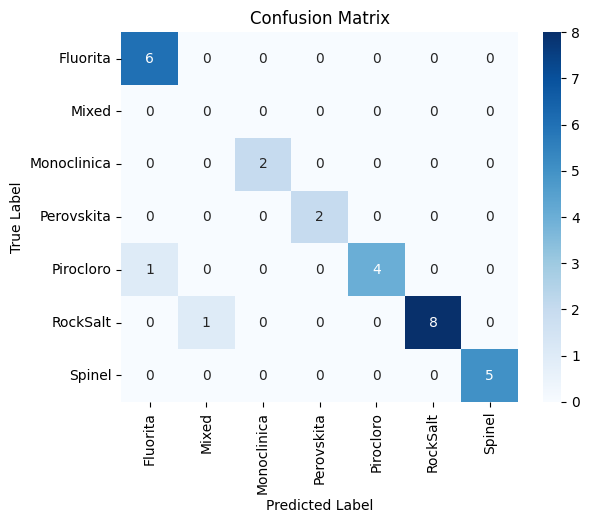

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = model.predict(X_test)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtenha os nomes das classes
class_names = ['Fluorita','Mixed' ,'Monoclinica' ,'Perovskita',
 'Pirocloro' ,'RockSalt' ,'Spinel']

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


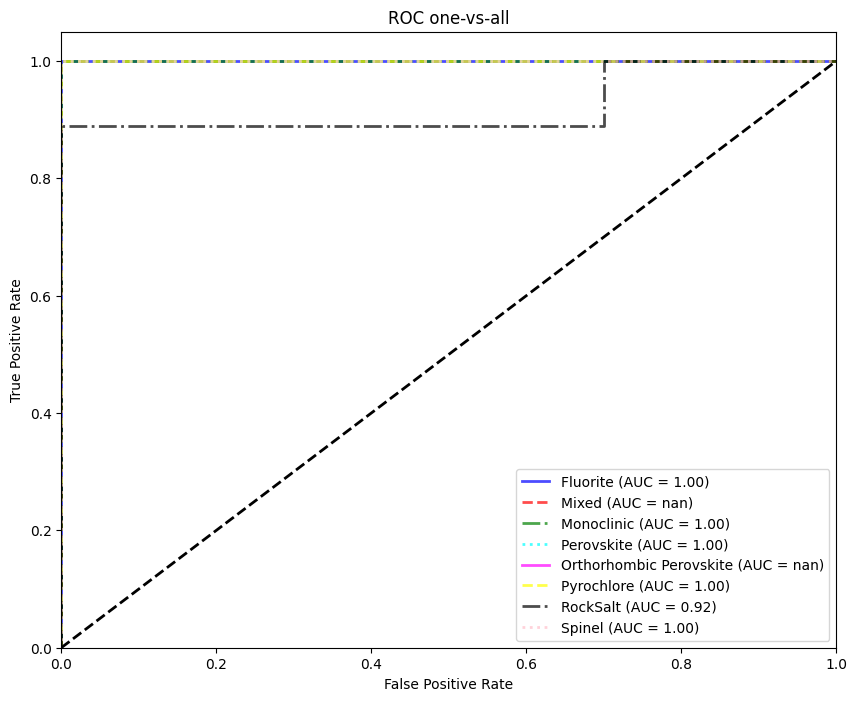

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
classes = model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = model.predict_proba(X_test)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Associar os nomes das classes binarizadas
class_labels = model.classes_

# Garantir que class_labels corresponde às classes
assert len(class_labels) == len(classes), "O número de class_labels deve corresponder ao número de classes."


class_labels_ing = [
    "Fluorite",
    "Mixed",
    "Monoclinic",
    "Perovskite",
    "Orthorhombic Perovskite",
    "Pyrochlore",
    "RockSalt",
    "Spinel"
]  # Lista para armazenar as classes em inglês

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
linestyles = cycle(['-', '--', '-.', ':'])
plt.figure(figsize=(10, 8))
for i, (color, linestyle) in zip(range(n_classes), zip(colors, linestyles)):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, lw=2, alpha=0.7,
             label='{0} (AUC = {1:0.2f})'.format(class_labels_ing[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC one-vs-all')
plt.legend(loc="lower right")
plt.show()



In [ ]:
import pickle

# Salvando as variáveis em um arquivo pickle
with open('fpr_tpr_rocauc_MLP.pkl', 'wb') as file:
    pickle.dump({'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}, file)